In [26]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [27]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/dio

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/dio


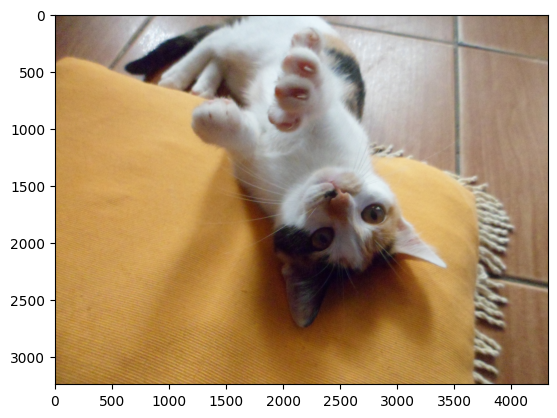

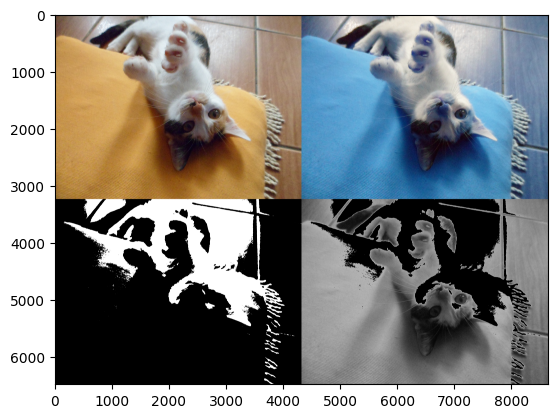

In [58]:
img_path = '/content/drive/MyDrive/dio/gatinha.jpg'
img = cv2.imread(img_path)

if img is None:
    print(f"Erro: Não foi possível encontrar a imagem {img_path}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

    img_bin = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    suave = cv2.GaussianBlur(img_bin, (7, 7), 0)
    gray_suave = cv2.cvtColor(suave, cv2.COLOR_RGB2GRAY)
    (T,bin) = cv2.threshold(gray_suave, 160, 255, cv2.THRESH_BINARY)
    (T,binI) = cv2.threshold(gray_suave, 160, 255, cv2.THRESH_BINARY_INV)

    img_gray = cv2.bitwise_and(img, img, mask = binI)
    img_gray_bitwase = cv2.cvtColor(img_gray, cv2.COLOR_RGB2GRAY)

     # Convert bin to 3D by adding a channel dimension:
    bin_3d = cv2.cvtColor(bin, cv2.COLOR_GRAY2BGR)
    # Convert img_gray_bitwase to 3D by adding a channel dimension
    img_gray_bitwase_3d = cv2.cvtColor(img_gray_bitwase, cv2.COLOR_GRAY2BGR)


    resultado = np.vstack([
        np.hstack([img, img_bin]),
        np.hstack([bin_3d, img_gray_bitwase_3d])
    ])

    plt.imshow(resultado)
    plt.show()

